<a href="https://colab.research.google.com/github/drshahizan/Python_EDA/blob/main/Malaysia%20EDA/MAAM/MAAM_Assignment_EDA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Group Members:**
1. MIKHEL ADAM BIN MUHAMMAD EZRIN A20EC0237
2. AHMAD MUHAIMIN BIN AHMAD HAMBALI A20EC0006



# **Malaysia Hospital Patient Movement**

This dataset shows the flow of patients to/out of hospitals, with capacity and utilisation since early 2020 until 20th December 2022 (for this analysis). The dataset was taken from Malaysia's Ministry of Health (MoH) Github repository which anyone is free to use to perform data analysis. In this analysis, we will utilize Python and various libraries including mathplotlib, pandas, seaborn, and numpy to conduct our analysis


## **Downloading the Dataset**
The dataset used can be found and downloaded [here](https://github.com/MoH-Malaysia/covid19-public/tree/main/epidemic)

The filename of the dataset is [hospital.csv](https://raw.githubusercontent.com/MoH-Malaysia/covid19-public/main/epidemic/hospital.csv)

The description for the columns of the dataset can be found [here](https://github.com/MoH-Malaysia/covid19-public/blob/6f7463be679a028ed7d5bc44e8104aa9992c8e72/epidemic/README.md)

## **Data Preparation and Cleaning**
In this part, we will clean the data by eliminating null values (if any) and converting certain data types to facilitate the analysis process

**Importing Pandas, Seaborn, and matplotlib**

In [ ]:
!pip install matplotlib

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
import matplotlib
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt
import statsmodels.formula.api as smf

# Configures the appearance of plots in the seaborn library and the matplotlib library.
sns.set_style('darkgrid')
matplotlib.rcParams['font.size'] = 14
matplotlib.rcParams['figure.figsize'] = (9, 5)
matplotlib.rcParams['figure.facecolor'] = '#00000000'

# This version of the dataset only has data until 20-12-2022
df = pd.read_csv("https://raw.githubusercontent.com/HUNK12/hpdp-assignment-2/main/hospital.csv")
# Reading dataset into DataFrame
df

,date,state,beds,beds_covid,beds_noncrit,admitted_pui,admitted_covid,admitted_total,discharged_pui,discharged_covid,discharged_total,hosp_covid,hosp_pui,hosp_noncovid
0,2020-03-24,Johor,1440,434,1408,0,0,0,0,0,0,18,9,1
1,2020-03-24,Kedah,1218,143,1183,0,0,0,0,0,0,46,5,12
2,2020-03-24,Kelantan,1463,280,1424,9,6,15,1,0,1,78,58,23
3,2020-03-24,Melaka,1091,82,1065,0,0,0,0,0,0,19,10,12
4,2020-03-24,Negeri Sembilan,1223,253,1205,0,0,0,0,0,0,90,13,8
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15614,2022-12-20,Selangor,4978,482,4836,31,25,56,33,24,57,106,84,3846
15615,2022-12-20,Terengganu,1590,410,1549,2,4,6,0,7,7,20,3,1312
15616,2022-12-20,W.P. Kuala Lumpur,3889,230,3791,7,14,21,6,7,13,71,10,2213
15617,2022-12-20,W.P. Labuan,122,23,110,0,1,1,0,0,0,2,0,66


**Examining the information about the dataset to determine the data types of the attributes.**

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15619 entries, 0 to 15618
Data columns (total 14 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   date              15619 non-null  object
 1   state             15619 non-null  object
 2   beds              15619 non-null  int64 
 3   beds_covid        15619 non-null  int64 
 4   beds_noncrit      15619 non-null  int64 
 5   admitted_pui      15619 non-null  int64 
 6   admitted_covid    15619 non-null  int64 
 7   admitted_total    15619 non-null  int64 
 8   discharged_pui    15619 non-null  int64 
 9   discharged_covid  15619 non-null  int64 
 10  discharged_total  15619 non-null  int64 
 11  hosp_covid        15619 non-null  int64 
 12  hosp_pui          15619 non-null  int64 
 13  hosp_noncovid     15619 non-null  int64 
dtypes: int64(12), object(2)
memory usage: 1.7+ MB


**Convert the values in the 'date' column of the DataFrame to datetime objects and sort accendingly based based on date**

In [ ]:
df['date'] = pd.to_datetime(df['date'], format='%Y-%m-%d')

# Creating new column for day, month, year
df.insert(loc=1, column='day', value=df['date'].dt.day )
df.insert(loc=2, column='month', value=df['date'].dt.month)
df.insert(loc=3, column='year', value=df['date'].dt.year)

# Sum of all patient
df['hosp_total'] = df['hosp_covid']+df['hosp_noncovid']+df['hosp_pui']

# Sort value from oldest to recent
df= df.sort_values(by='date')
df

,date,day,month,year,state,beds,beds_covid,beds_noncrit,admitted_pui,admitted_covid,admitted_total,discharged_pui,discharged_covid,discharged_total,hosp_covid,hosp_pui,hosp_noncovid,hosp_total
0,2020-03-24,24,3,2020,Johor,1440,434,1408,0,0,0,0,0,0,18,9,1,28
14,2020-03-24,24,3,2020,W.P. Labuan,122,9,115,0,0,0,0,0,0,5,3,2,10
13,2020-03-24,24,3,2020,W.P. Kuala Lumpur,1570,248,1537,0,0,0,0,0,0,70,15,1,86
12,2020-03-24,24,3,2020,Terengganu,1232,215,1209,0,0,0,0,0,0,9,6,14,29
11,2020-03-24,24,3,2020,Selangor,887,504,783,5,16,21,0,24,24,261,39,184,484
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15604,2022-12-20,20,12,2022,Kedah,2755,312,2673,6,33,39,6,10,16,44,5,2197,2246
15603,2022-12-20,20,12,2022,Johor,4082,443,3970,14,16,30,6,19,25,60,12,3311,3383
15617,2022-12-20,20,12,2022,W.P. Labuan,122,23,110,0,1,1,0,0,0,2,0,66,68
15609,2022-12-20,20,12,2022,Perak,5184,466,5089,2,24,26,4,27,31,86,8,3294,3388


**Checking if there are any null values for each column.**

In [ ]:
df.isna().sum()

date                0
day                 0
month               0
year                0
state               0
beds                0
beds_covid          0
beds_noncrit        0
admitted_pui        0
admitted_covid      0
admitted_total      0
discharged_pui      0
discharged_covid    0
discharged_total    0
hosp_covid          0
hosp_pui            0
hosp_noncovid       0
hosp_total          0
dtype: int64

**Generate descriptive statistics of the data in the DataFrame**

In [ ]:
df.describe()

,day,month,year,beds,beds_covid,beds_noncrit,admitted_pui,admitted_covid,admitted_total,discharged_pui,discharged_covid,discharged_total,hosp_covid,hosp_pui,hosp_noncovid,hosp_total
count,15619,15619,2e+04,15619,15619,15619,15619,15619,15619,15619,15619,15619,15619,15619,15619,15619
mean,16,7,2e+03,2277,532,2189,18,37,56,14,32,46,199,41,1217,1457
std,9,3,8e-01,1495,534,1445,36,67,93,27,59,78,346,77,861,1050
min,1,1,2e+03,122,0,95,0,0,0,0,0,0,0,0,0,0
25%,8,4,2e+03,1223,148,1184,0,2,5,0,2,4,15,2,620,759
50%,16,7,2e+03,1985,407,1872,4,13,20,3,11,18,74,10,1019,1220
75%,23,10,2e+03,3120,750,2970,15,41,62,12,34,52,249,40,1712,2022
max,31,12,2e+03,6568,4713,6224,451,789,914,236,658,732,4218,874,9106,9291


## **Exploratory Analysis and Visualization**

In this part, we will analyze various aspects of the dataset and present our findings using bar charts, pie charts, and scatter plots.

**Finding the average number of covid patients admitted to the hospital per day for each year**

In [ ]:
covid_years = df.groupby('year').apply(lambda x: x['admitted_covid'].mean()).reset_index(name= "Avg. C19 Patients per day")
covid_years = covid_years.rename(columns={'year': 'Year'})
pd.set_option('display.precision',0)
covid_years

,Year,Avg. C19 Patients per day
0,2020,10
1,2021,67
2,2022,28


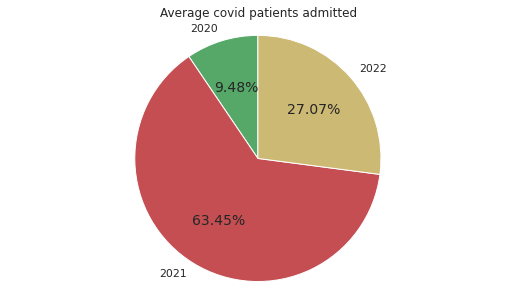

In [ ]:
labels = covid_years['Year']
sections = covid_years['Avg. C19 Patients per day']
colors = ['g', 'r', 'y']

plt.pie(sections, labels=labels, colors=colors,
        startangle=90,
        autopct = '%1.2f%%')

plt.axis('equal')
plt.title('Average covid patients admitted')
plt.show()

**Interesting Notes**

>Based on the figures above, the average patients admitted was in 2021 was the highest at about 67 patients per day contributing to 63.45% of overall patients admitted within the 3 years.

**Finding the sum of patients discharged for each state**

In [ ]:
state_discharged = df.groupby('state').apply(lambda x: x['discharged_total'].sum()).reset_index(name= "Patients Discharged").sort_values(by= "Patients Discharged", ascending=False)
state_discharged = state_discharged.rename(columns={'state': 'States'})
state_discharged

,States,Patients Discharged
11,Selangor,163513
10,Sarawak,126332
0,Johor,98559
9,Sabah,65486
2,Kelantan,38737
13,W.P. Kuala Lumpur,37997
4,Negeri Sembilan,31880
6,Perak,29214
1,Kedah,26624
5,Pahang,23565


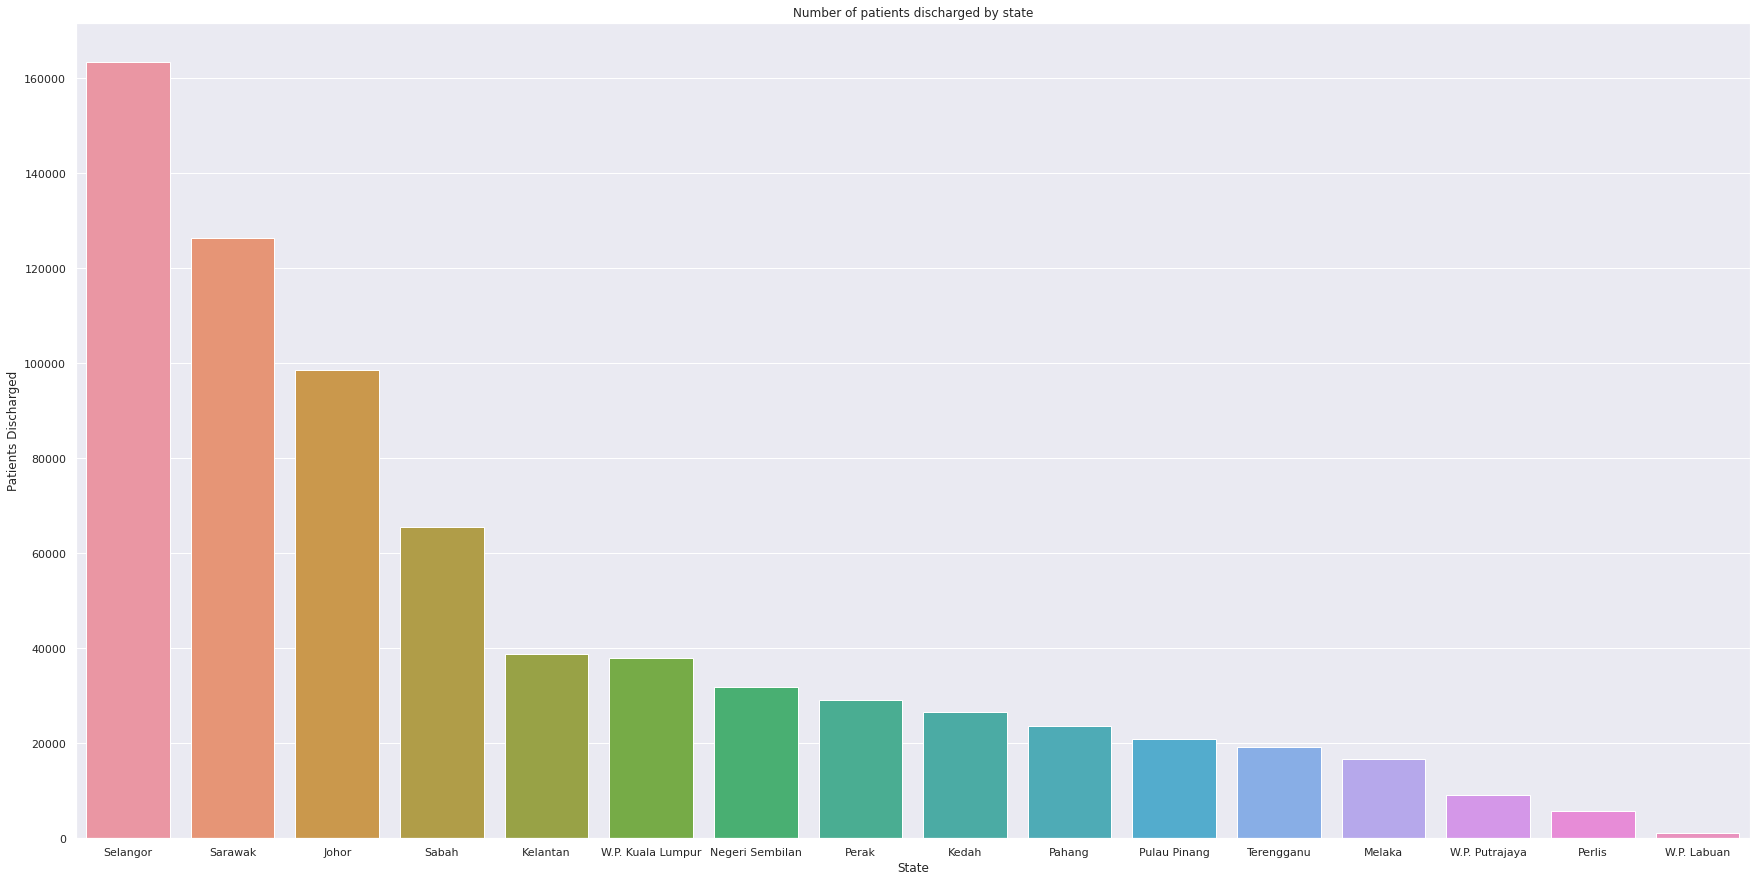

In [ ]:
sns.set_theme()

fig, ax = plt.subplots(figsize=(30, 15))
sns.barplot(x=state_discharged['States'], y=state_discharged['Patients Discharged'])
ax.set(xlabel ="State", ylabel = "Patients Discharged", title ='Number of patients discharged by state')

plt.show()

**Interesting Notes**

>Based on the figures above, we can see that Selangor has the highest number of discharges. This is probably due to the fact that Selangor has a higher population than other states and more covid cases.

**Finding the sum of covid patients admitted for each state**

In [ ]:
state_admitted = df.groupby('state').apply(lambda x: x['admitted_covid'].sum()).reset_index(name= "Covid Patients Admitted").sort_values(by= "Covid Patients Admitted", ascending=False)
state_admitted = state_admitted.rename(columns={'state': 'States'})
state_admitted

,States,Covid Patients Admitted
11,Selangor,115700
10,Sarawak,88492
0,Johor,69696
9,Sabah,46682
13,W.P. Kuala Lumpur,39221
6,Perak,36987
2,Kelantan,36890
4,Negeri Sembilan,34818
1,Kedah,29636
8,Pulau Pinang,25188


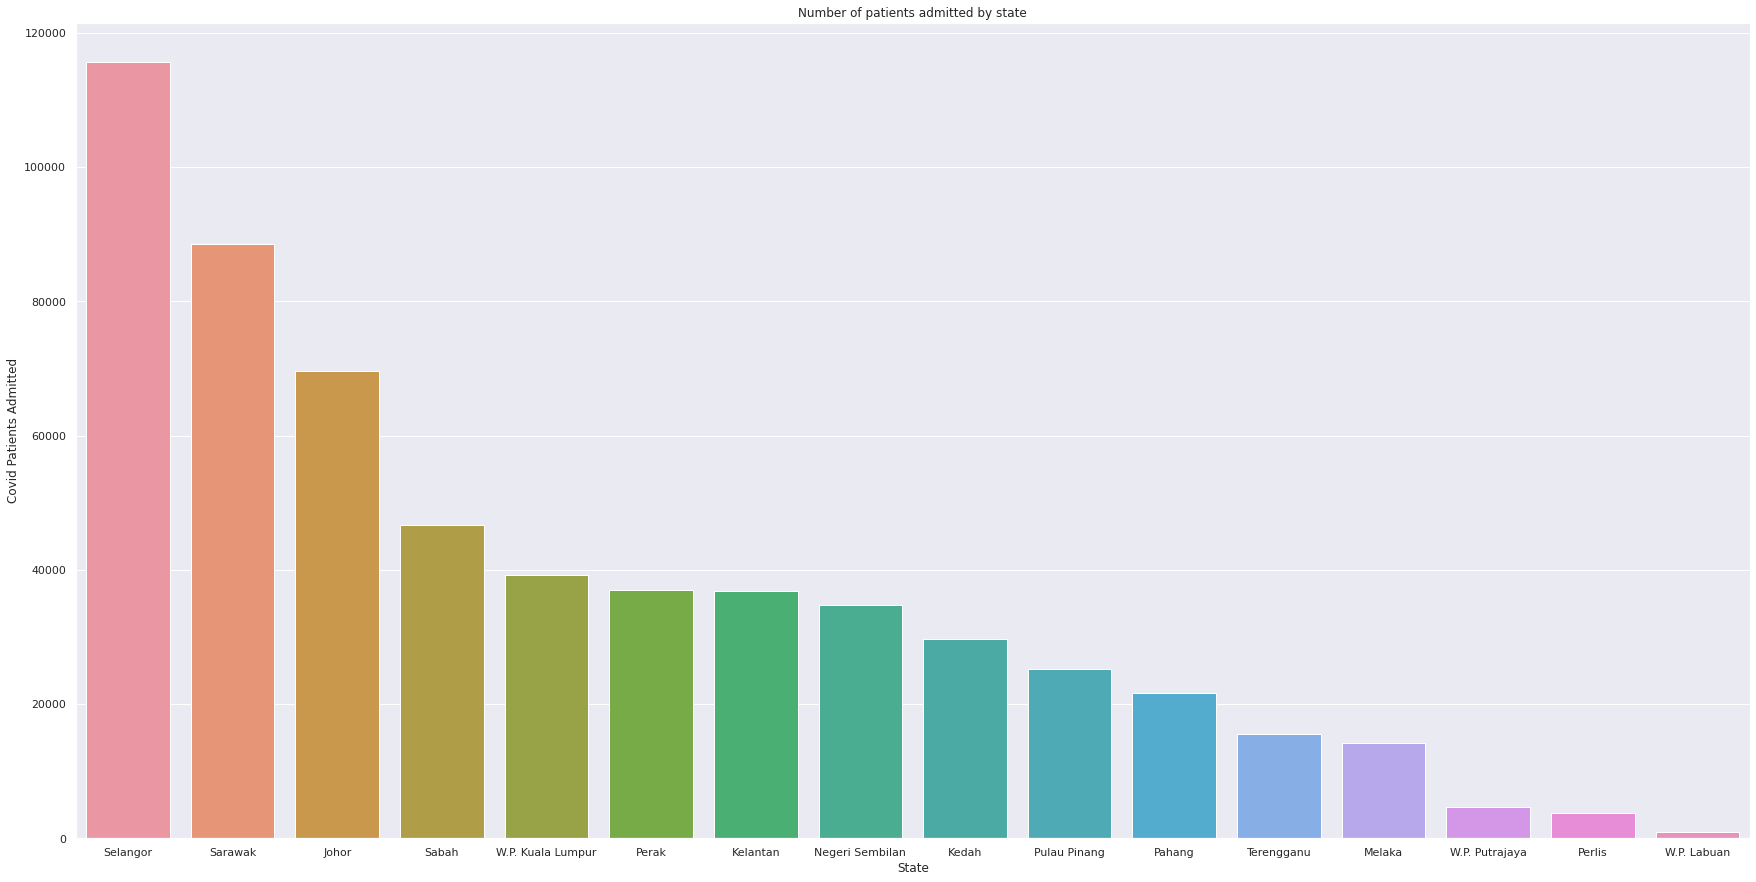

In [ ]:
fig, ax = plt.subplots(figsize=(30, 15))
sns.barplot(x=state_admitted['States'], y=state_admitted['Covid Patients Admitted'])
ax.set(xlabel ="State", ylabel = "Covid Patients Admitted", title ='Number of patients admitted by state')

plt.show()

**Interesting Notes**

>Based on the figures above, Selangor again has the highest number of patients admitted overall probably also due to the fact that it has a higher population.

**Comparing the trend of admitted patients and discharged patients by year**

In [ ]:
df_grouped = df.groupby('year').agg({'admitted_total': 'sum', 'discharged_total': 'sum'}).rename(columns={'admitted_total': 'Total admitted', 'discharged_total': 'Total discharged'}).reset_index()
df_grouped = df_grouped.rename(columns={'year': 'Year'})
df_grouped

,Year,Total admitted,Total discharged
0,2020,59537,47596
1,2021,541645,446791
2,2022,269025,220366


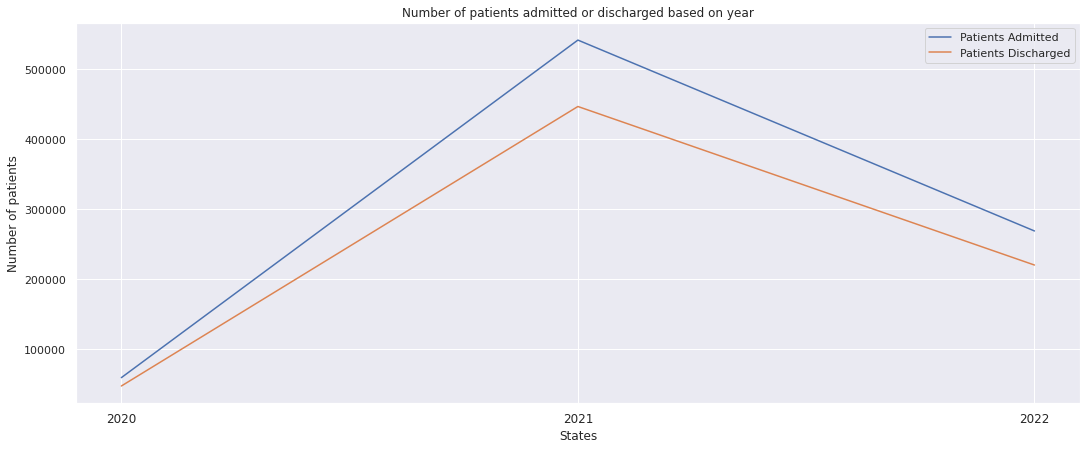

In [ ]:
# Assign x and y variables
x  = df_grouped['Year']
y1 = df_grouped['Total admitted']
y2 = df_grouped['Total discharged']

# Create the figure and subplot with a width of 10 inches
fig, ax = plt.subplots(figsize=(18,7))

# Plot the data
ax.plot(x, y1, label="Patients Admitted")
ax.plot(x, y2, label="Patients Discharged")

# Set the tick marks and labels for the x-axis
ax.set_xticks(x)
ax.set_xticklabels(x, fontsize=12)

# Label the axes and add a title
ax.set_xlabel("States")
ax.set_ylabel("Number of patients")
ax.set_title("Number of patients admitted or discharged based on year")

# Add a legend
ax.legend()

# Show the plot
plt.show()

**Interesting Notes**

>Looking at the line chart above, we can see that the number of patients admitted has the same trend with the number of patients discharged meaning that there is indeed a correlation.

## **Asking and Answering Questions**

In this part we will be asking questions and answering them by creating visualizations when possible.


#### **Q1: Which top 3 months have the highest number of COVID Patients in hospitals in 2021?**  

In [ ]:
months = df.loc[df.date.dt.year == 2021, ['hosp_covid','month']]

top5 = months.groupby('month').hosp_covid.sum().reset_index(name='COVID Patients').sort_values(by ='COVID Patients', ascending= False)
top5['COVID Patients'] = top5['COVID Patients'].apply(lambda x: "{:,}".format(x))
top5.head()

,month,COVID Patients
7,8,"429,005"
8,9,"311,672"
6,7,"310,953"
5,6,"208,670"
9,10,"183,333"


**Description**

> According to the DataFrame above, we can see the top 5 months in 2021 that had the most COVID patients in hospitals.



#### **Q2: Compare the number of admitted covid patients by year throught the months**

Text(0.5, 1.0, 'Trend line of number of newly admitted covid patient from each year')

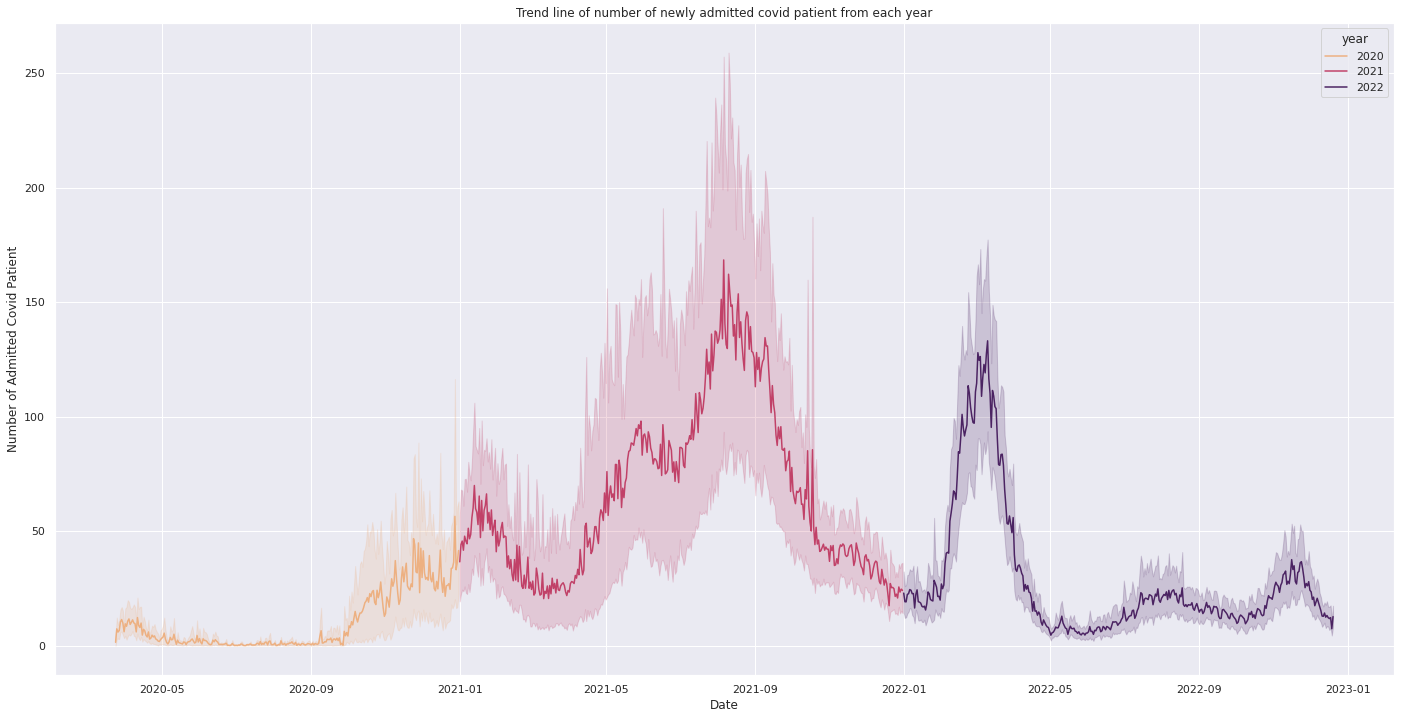

In [ ]:
plt.figure(figsize=(24,12))
sns.lineplot(x='date', y='admitted_covid',hue='year', palette="flare", data=df)
plt.xlabel("Date")
plt.ylabel("Number of Admitted Covid Patient")
plt.title("Trend line of number of newly admitted covid patient from each year")

**Description**

> In the line plot above, there is a big spike in the number of covid patients in about August of 2021 which was when a covid wave hit the country. Another covid wave spike can also be seen in early 2022 but eventually settled down quickly



#### **Q3: Which state has the highest number of total admitted patients?**

In [ ]:
df_barplot = df.groupby('state').apply(lambda x: x['admitted_total'].sum()).reset_index(name= "Admitted Total").sort_values(by= "Admitted Total", ascending=False)
df_barplot

,state,Admitted Total
11,Selangor,201679
10,Sarawak,134937
0,Johor,134513
9,Sabah,82624
2,Kelantan,44545
13,W.P. Kuala Lumpur,43550
6,Perak,41412
4,Negeri Sembilan,39374
1,Kedah,36837
8,Pulau Pinang,26342


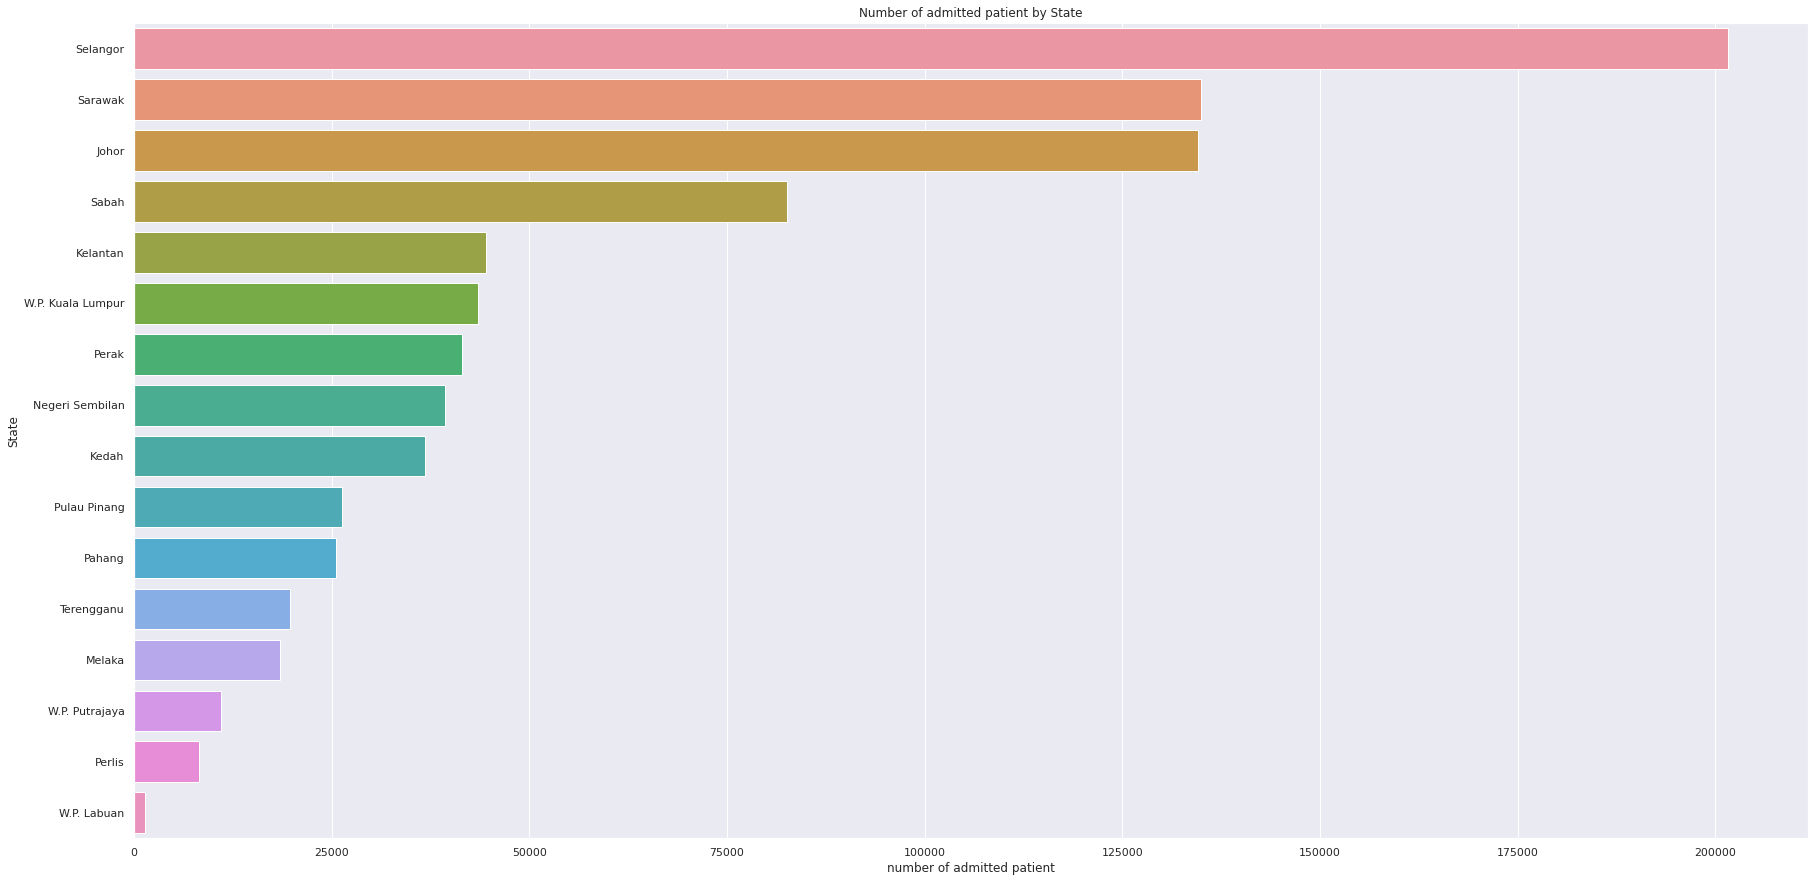

In [ ]:
fig, ax = plt.subplots(figsize=(30, 15))
sns.barplot(x='Admitted Total', y='state', data=df_barplot, orient='h')
ax.set(ylabel ="State", xlabel = "number of admitted patient", title ='Number of admitted patient by State')
plt.show()

**Description**

> Based on the horizontal bar plot above, we can see that Selangor has the highest number of admitted patients.



#### **Q4: Which state has the highest discharge rate (most discharges based on total admitted patients)?**



In [ ]:
df_q4 = df.groupby('state').agg({'discharged_total': 'sum', 'admitted_total': 'sum'}).rename(columns={'admitted_total': 'Total Patients', 'discharged_total': 'Total Discharged'}).reset_index()
df_q4['Discharge Rate'] = df_q4['Total Discharged']/df_q4['Total Patients']
highest_rate = df_q4['Discharge Rate'].idxmax()
df_q4['Discharge Rate'] = df_q4['Discharge Rate'].apply(lambda x: '{:.2%}'.format(x))
df_q4.loc[highest_rate]

state               Terengganu
Total Discharged         19191
Total Patients           19719
Discharge Rate          97.32%
Name: 12, dtype: object

**Description**

> The state with the highest discharge rate is Terengganu which is 97.32%. This means that around 97% of patients admitted have been successfully discharged from the hospital.



#### **Q5: Are the hospitals able to discharge patients at the same rate they are admitted?**

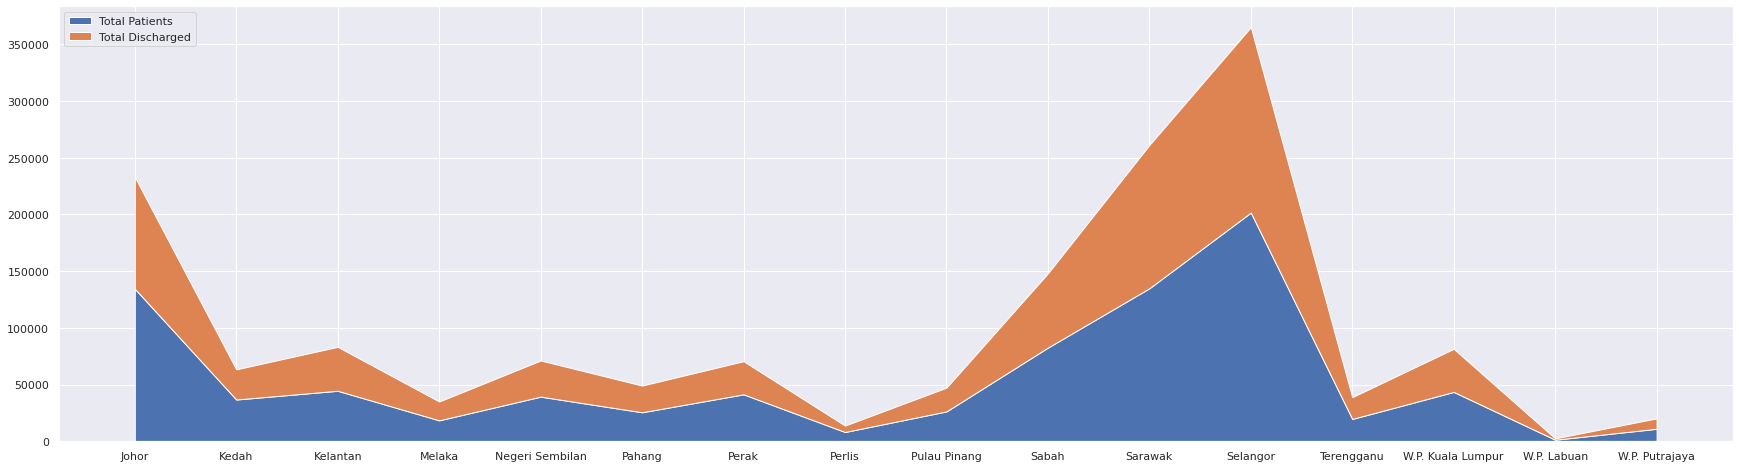

In [ ]:
df_q5 = df.groupby('state').agg({'discharged_total': 'sum', 'admitted_total': 'sum'}).rename(columns={'admitted_total': 'Total Patients', 'discharged_total': 'Total Discharged'}).reset_index()
df_q5['Discharge Rate'] = (df_q5['Total Discharged']/df_q5['Total Patients'])*100

# Extract the data for the stack plot
states = df_q5['state']
total_patients = df_q5['Total Patients']
total_discharged = df_q5['Total Discharged']

# Create the stack plot
plt.figure(figsize=(30, 8))
plt.stackplot(states, total_patients, total_discharged, labels=['Total Patients', 'Total Discharged'])
# Add a legend and show the plot
plt.legend(loc='upper left')
plt.show()

**Description**

> Since the orange area that represents the 'Total Discharged' patients is always above the blue area, we can safely say that all the hospitals are able to discharge patients as quickly as they are admitted.



## **Inferences and Conclusion**

In 2021, the top 5 months with the most COVID patients in hospitals were August, September, Julu, June, and October. There were two significant spikes in COVID cases in 2021, one in August and another in early 2022. The second spike eventually subsided quickly. Selangor had the highest number of admitted COVID patients among the states mentioned. Terengganu had the highest discharge rate of 97.32%, meaning that around 97% of admitted patients were successfully discharged from the hospital. The number of discharged patients was always higher than the number of admitted patients, indicating that all hospitals were able to discharge patients as quickly as they were admitted.

We can see that we were able to gather some useful information from this dataset that could prove beneficial in certain studies.



## **References and Future Work**


[Charts in Colaboratory Notebook](https://colab.research.google.com/notebooks/charts.ipynb
)

[Seaborn Website](http://seaborn.pydata.org/)

There are several potential future projects that could be undertaken using this dataset which include:

Examination of factors that impact hospitalization and discharge rates: The dataset could be used to investigate factors that may impact the likelihood of hospitalization and the success of discharging patients. For example, research could be done to identify any correlations between hospitalization rates and patient demographics or underlying health conditions.

Predictive modeling: Machine learning techniques could be used to build predictive models that forecast the number of COVID cases and hospitalizations in the future. This could be useful for public health planning and resource allocation.

Evaluation of interventions: The data could be used to evaluate the effectiveness of different interventions, such as vaccination campaigns or social distancing measures, in reducing the number of COVID cases and hospitalizations.